# time series analysis using pandas

In [14]:
from datetime import datetime
import numpy as np
import pandas as pd

In [4]:
my_year = 2022
my_month =  1
my_day = 2
my_hour = 13
my_minute = 30
my_second =15
my_date = datetime(my_year,my_month, my_day)


In [5]:
my_date

datetime.datetime(2022, 1, 2, 0, 0)

In [6]:
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)

In [7]:
my_date_time

datetime.datetime(2022, 1, 2, 13, 30, 15)

In [9]:
my_date_time.minute

30

In [13]:
np.array(["2020-03-15", "2020-03-16", "2020-03-17"], dtype = "datetime64")

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [16]:
pd.date_range("2020-01-01", periods = 7,  freq = "D" )

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [19]:
pd.date_range("Jan 01, 2018", periods = 7, freq = 'M')

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31'],
              dtype='datetime64[ns]', freq='M')

In [25]:
pd.to_datetime(["2/1/2018", "3/1/2018"], format = "%d/%m/%Y",)

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [28]:
data = np.random.rand(3,2)
col = ["A","B"]
data

array([[0.13896369, 0.89609989],
       [0.2970885 , 0.19879688],
       [0.29484596, 0.03124893]])

In [30]:
idx = pd.date_range("2020-01-01", periods = 3, freq = "D")
df = pd.DataFrame(data,index = idx, columns = col)

In [31]:
df

,A,B
2020-01-01,0.138964,0.896100
2020-01-02,0.297089,0.198797
2020-01-03,0.294846,0.031249


In [32]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [33]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [34]:
df.index.argmax()

2

In [35]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [36]:
df.index.argmin()

0

# time resampling

In [48]:
df = pd.read_csv("C:\\Users\\pc\\Downloads\\UDEMY_TSA_FINAL\\UDEMY_TSA_FINAL\\Data\\starbucks.csv", index_col = "Date", parse_dates=True)

In [49]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [51]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
Close     1006 non-null float64
Volume    1006 non-null int64
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [54]:
df.resample(rule= 'A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [57]:
df.resample(rule = "M").sum().head()

,Close,Volume
Date,,
2015-01-31,774.5894,267360054
2015-02-28,814.3862,150265664
2015-03-31,975.0804,195931326
2015-04-30,955.6872,179360919
2015-05-31,949.7730,134474323


In [58]:
df.resample(rule = "Q").mean()

,Close,Volume
Date,,
2015-03-31,42.033705,1.005831e+07
2015-06-30,47.622476,7.375698e+06
2015-09-30,52.742539,9.206285e+06
2015-12-31,57.498228,8.002620e+06
2016-03-31,55.171702,1.093832e+07
2016-06-30,54.050434,8.582716e+06
2016-09-30,53.350578,8.996589e+06
2016-12-31,53.040917,8.753118e+06
2017-03-31,54.447013,9.846263e+06


# for custom resampling problems

In [59]:
def first_day(entry):
    if len(entry):
        return entry[0]

In [66]:
df.resample(rule = "M").apply(first_day).head()


,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-02-28,41.0629,13638832
2015-03-31,44.1331,7947018
2015-04-30,43.5687,14125350
2015-05-31,47.1097,5916509


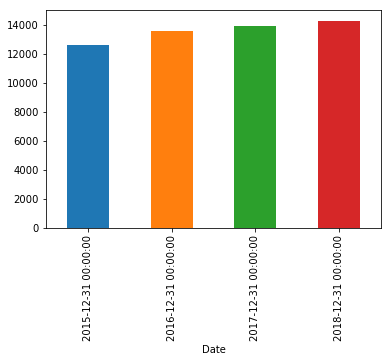

In [68]:
df['Close'].resample(rule = "A").sum().plot.bar()

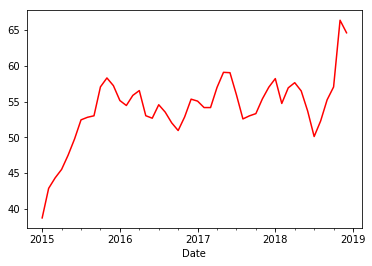

In [71]:
df["Close"].resample(rule = "M").mean().plot.line(c="r")

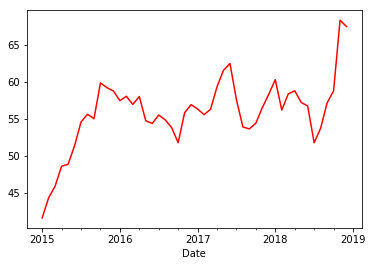

In [72]:
df["Close"].resample(rule = "M").max().plot.line(c="r")

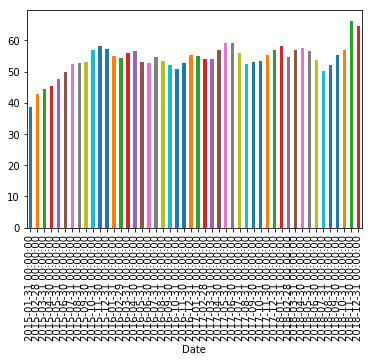

In [74]:
df["Close"].resample(rule = "M").mean().plot.bar()

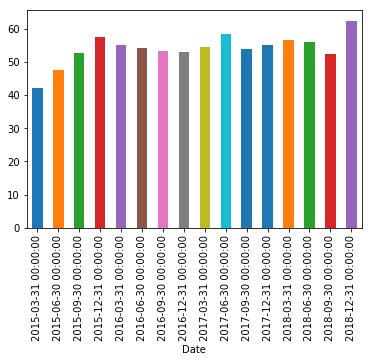

In [75]:
df["Close"].resample(rule = "Q").mean().plot.bar()

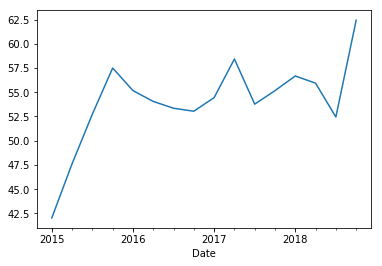

In [76]:
df["Close"].resample(rule = "Q").mean().plot.line()

In [77]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [81]:
df.shift(5).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN


In [82]:
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [86]:
df.shift(1,freq ="M").head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


In [87]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


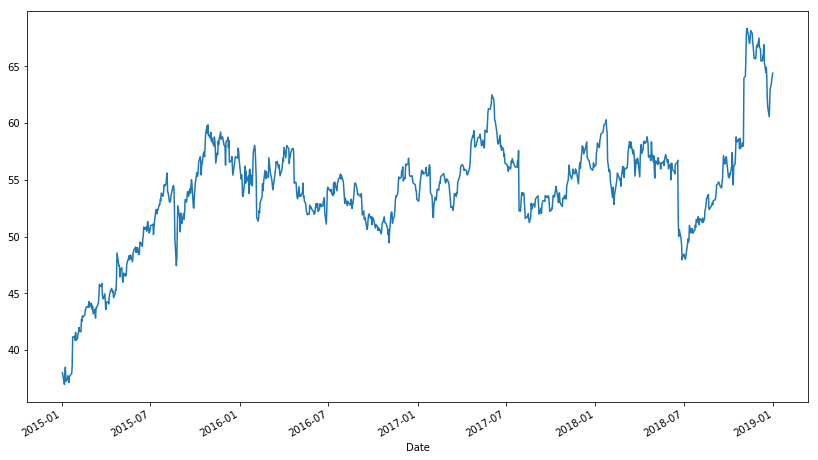

In [89]:
df["Close"].plot(figsize = (14,8))

Date
2015-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2015-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2015-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2016-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2016-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2016-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2016-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2017-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2017-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2017-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2017-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2018-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2018-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2018-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2018-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: Q-DEC, Name: Close, dtype: object

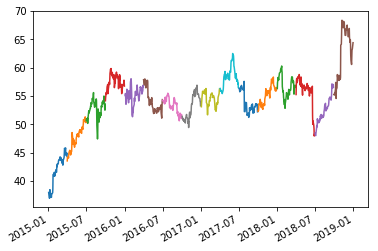

In [91]:
df["Close"].resample(rule = "Q").plot()

In [93]:
df.shape

(1006, 2)

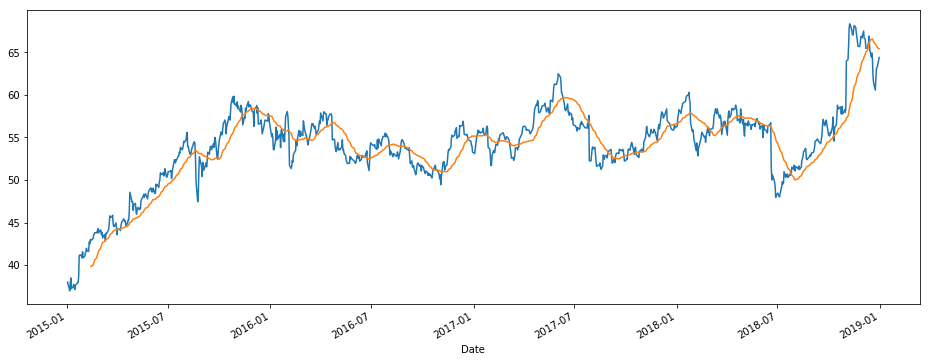

In [102]:
df["Close"].plot(figsize = (16,6))
df["Close"].rolling(window = 30).mean().plot()

In [99]:
df["Close: 30 day mean"] = df["Close"].rolling(window = 30).mean()

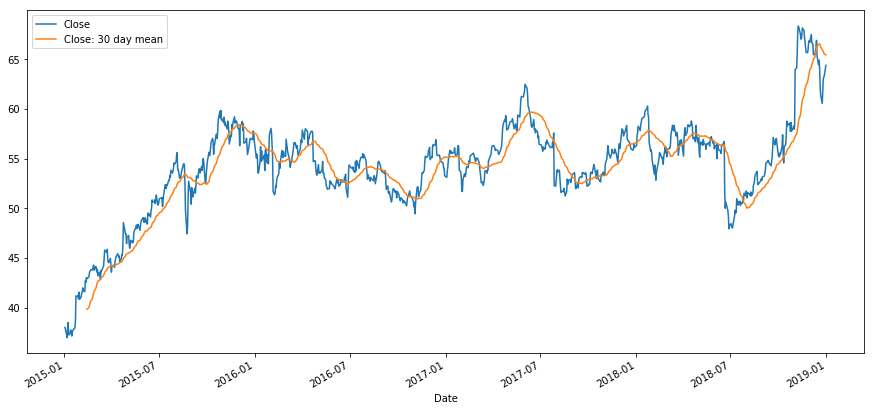

In [101]:
df[["Close", "Close: 30 day mean"]].plot(figsize = (15,7))

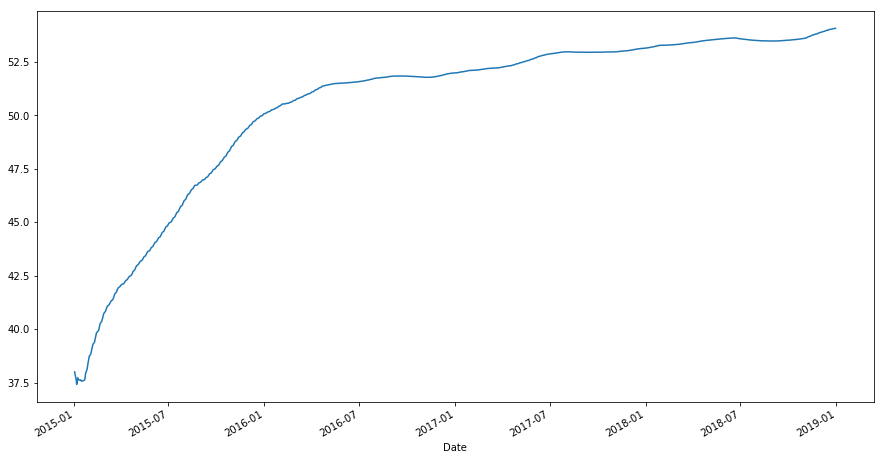

In [103]:
df["Close"].expandinganding().mean().plot(figsize = (15,8))

In [104]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

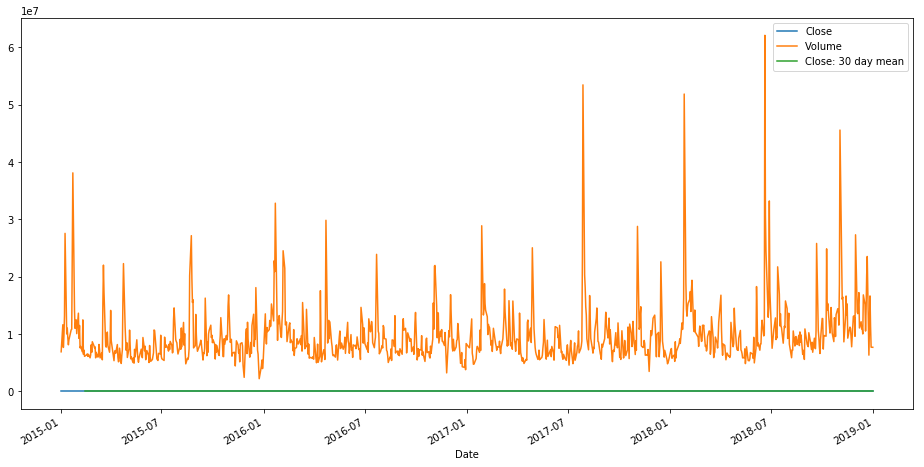

In [107]:
df.plot(figsize = (16,8));

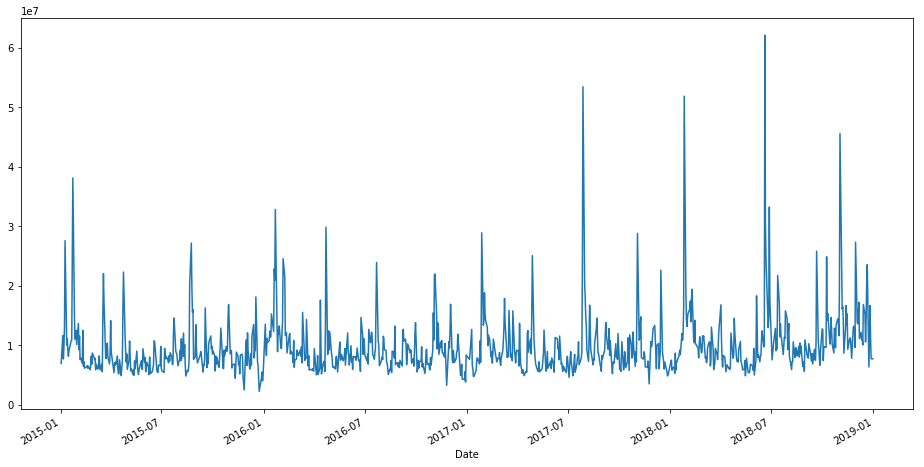

In [109]:
df["Volume"].plot(figsize =(16,8))

In [111]:
title = "the closing value graph:"
xlabel = "Date"
ylabel = "closing price"

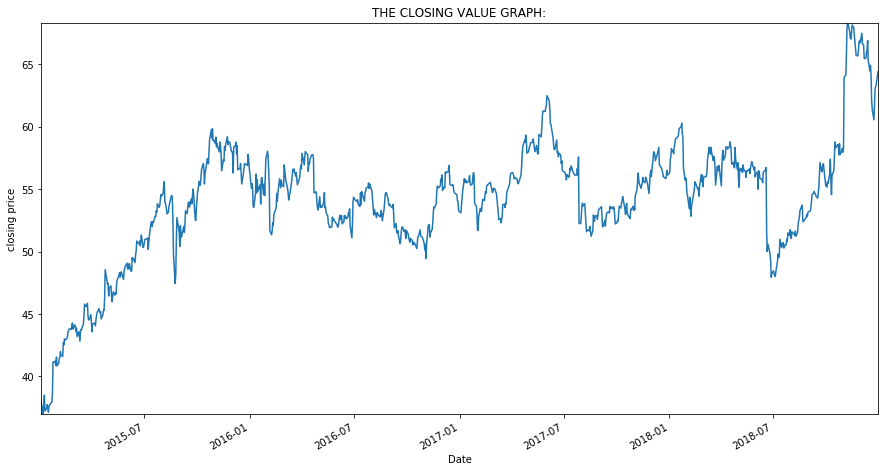

In [126]:
ax=df["Close"].plot(figsize = (15,8), title = title.upper());
ax.set(xlabel = "Date", ylabel = "closing price")
ax.autoscale(tight =True)

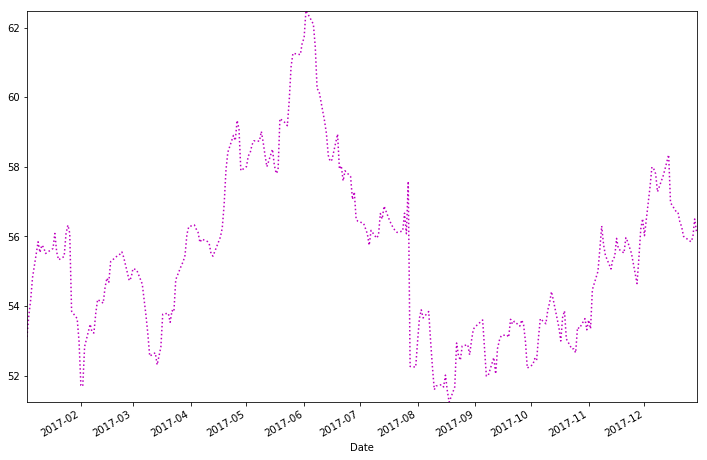

In [149]:
df["Close"]["2017-01-01": "2017-12-31"].plot(figsize = (12,8), xlim = ["2017-01-01", "2017-12-31"], ylim = [30,70], ls=":", c ="m").autoscale(tight = True)

In [150]:
from matplotlib import dates

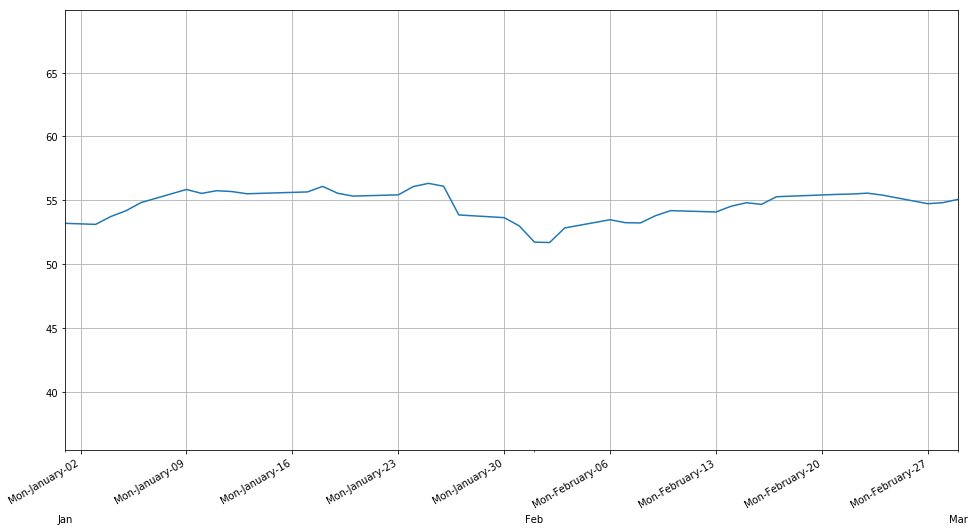

In [171]:
ax = df["Close"].plot(xlim=["2017-01-01", "2017-03-01"], figsize = (16,9))
ax.set(xlabel ="")
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

ax.xaxis.set_minor_formatter(dates.DateFormatter("\n\n\n\n\n%b"))
ax.xaxis.set_minor_locator(dates.MonthLocator())

ax.xaxis.grid(True)
ax.yaxis.grid(True)
